# Exercise: NEISS, Question Set C

#### Summary

The [National Electronic Injury Surveillance System](https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS) is a data product produced by the US Consumer Product Safety Commission. It tracks emergency room injuries related to consumer products (e.g., "a door fell on me!").

#### Files

- **nss15.tsv**: injury data (one injury per row)
- **2017NEISSCodingManualCPSConlyNontrauma.pdf**: column definitions and explanations
- **2015 Neiss data highlights.pdf**: a partial summary of the data
- **2017ComparabilityTable.pdf**: product code definitions
- **categories-cleaned.txt**: product code definitions in CSV format (great for joining!)

#### Source

https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS

#### Skills

- Reading tab-separated files
- Ignoring bad lines
- Replacing values
- Using numpy/`np.nan`
- String search using regular expressions
- Averages practice
- Converting `.value_counts()` and similar results into DataFrames

# Read in `nss15.tsv`

Some of the lines just **aren't formatted correctly**. Maybe we can avoid those?

In [102]:
import pandas as pd
%matplotlib inline
import numpy as np

In [103]:
df = pd.read_csv('nss15.tsv', sep='\t', error_bad_lines=False)
df

b'Skipping line 10822: expected 19 fields, saw 20\n'
b'Skipping line 48623: expected 19 fields, saw 20\nSkipping line 62534: expected 19 fields, saw 20\n'
b'Skipping line 103739: expected 19 fields, saw 20\n'
b'Skipping line 135495: expected 19 fields, saw 20\nSkipping line 151678: expected 19 fields, saw 20\n'
b'Skipping line 237135: expected 19 fields, saw 20\nSkipping line 240597: expected 19 fields, saw 20\n'
b'Skipping line 274270: expected 19 fields, saw 20\nSkipping line 277461: expected 19 fields, saw 20\n'


,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,0,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,1,1,NaN,57,NaN,34,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,1,0,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,2,3,HISPANIC,62,NaN,75,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY
5,150721815,07/02/2015,32,5.6748,C,216,2,1,NaN,71,DOG SCRATCH/BITE,76,1,1,0,1715,NaN,16 MOF AT HOME PULLED FAMILY DOG-HUSKIES COLLA...,"ND SCRAPING TEETH ON PTS FACE, NOT A TRUE BITE..."
6,150713483,06/08/2015,93,15.7762,V,25,1,2,NaN,51,NaN,33,4,9,3,1138,NaN,25 YOM WAS CAMPING WHEN FRIEND THREW A PRESSUR...,WHICH FLASHED. FD NS. DX: BURNS L UPPER & LOW...
7,150704114,06/14/2015,56,83.2157,S,53,1,1,NaN,57,NaN,30,1,0,0,5040,NaN,53 YOM BIKE WRECK SUNDAY PAIN CHEST SHOULDER &...,NaN
8,150736558,07/16/2015,70,83.2157,S,98,1,2,NaN,59,NaN,76,1,1,0,1807,NaN,98 Y/O M FELL IN FLOOR AND LACERATED FACE,NaN
9,150734928,07/13/2015,51,74.8813,L,48,2,2,NaN,53,NaN,79,1,5,0,4057,1807.0,"48 YO F, C/O RT FLANK PAIN 6 DAYS S/P FALL WAS...",ABLE WHICH HIT THE FLOOR STRIKING RT FLANK DX ...


### Check that your dataframe has 357727 rows and 19 columns.

In [104]:
df.shape

(357727, 19)

### List the columns and their data types

In [105]:
df.dtypes

CPSC Case #      int64
trmt_date       object
psu              int64
weight         float64
stratum         object
age              int64
sex              int64
race             int64
race_other      object
diag             int64
diag_other      object
body_part        int64
disposition      int64
location         int64
fmv              int64
prod1            int64
prod2          float64
narr1           object
narr2           object
dtype: object

### What does each column mean?

In [106]:
# diag: diagnosis code
# race: 0 = not stated, 1 = white, 2 = black, …
# prod1/prod2: code of the products involved in the injury

# Cleaning up a column

Take a look at the **sex** column. How many rows of each sex are there?

In [107]:
# 1 = male, 2 = female, 0 = not recorded
df['sex'].value_counts()

1    195071
2    162654
0         2
Name: sex, dtype: int64

## Replace the numbers with the appropriate words they stand for.

Those numbers are terrible - codes are fine for storage but not really for reading. **Replace the numbers with the  words they stand for.**

Refer to page 7 of the column definitions file.

In [108]:
df['sex'] = df['sex'].astype('str').replace('1', 'male').replace('2', 'female').replace('0', 'not recorded')

## Confirm you have 195071 male, 162654 female, and 2 "Not Recorded."

In [109]:
df['sex'].value_counts()

male            195071
female          162654
not recorded         2
Name: sex, dtype: int64

## Graph the number of men and women, but don’t included the “Not Recorded” records

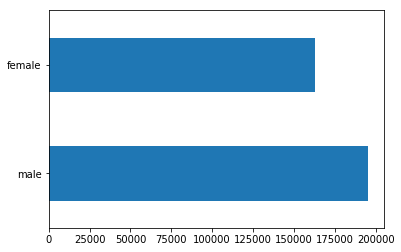

In [110]:
df[df['sex'] != 'not recorded']['sex'].value_counts().plot(kind='barh')

## "Not recorded" seems silly - change it to be `NaN` instead

Don't use `na_values` for this.

In [111]:
df['sex'] = df['sex'].replace('not recorded', np.nan)
df['sex'].value_counts()

male      195071
female    162654
Name: sex, dtype: int64

## Graph the count of men and women, but don’t included the “Not Recorded” records

Yes, again! The code you use should be different this time.

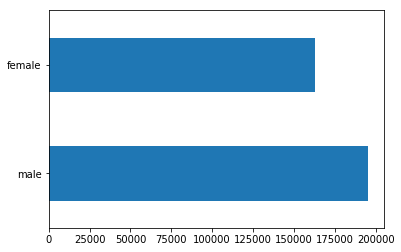

In [112]:
df['sex'].value_counts().plot(kind='barh')

# Wall punching

## Find every instance where the narrative includes punching a wall

Include phrases like "punched a wall" or "punch wall" or "punched ten thousand walls." Do not type them each individually. How do you do that?????

In [113]:
df_wall = df[df['narr1'].str.contains('PUNCH.*WALL')]
df_wall

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
246,150532226,05/07/2015,63,97.9239,M,38,male,0,NaN,57,NaN,82,1,0,0,1884,NaN,38YOM PUNCHED A WALL FRACTURED HAND,NaN
582,150954076,09/16/2015,22,15.7762,V,13,male,1,NaN,57,NaN,82,1,1,0,1884,NaN,"PT PUNCHED A WALL. FRACTURE METACARPAL, RIGHT,...",NaN
604,150541260,04/09/2015,53,15.0591,V,22,male,1,NaN,71,HAND INJURY,82,1,1,0,1884,NaN,22YOM-HAND INJURY-PUNCHED A CEMENT WALL IN ANG...,NaN
704,151017458,10/05/2015,61,16.5650,V,15,female,1,NaN,53,NaN,82,1,1,0,1884,NaN,15 YOF C/O RIGHT HAND PAIN SINCE PUNCHING A WA...,DX: CONTUSION OF HAND
741,150433154,04/02/2015,91,15.0591,V,33,male,1,NaN,57,NaN,82,1,0,0,1884,NaN,33YOM PUNCHED A WALL X1 WEEK AGO W/ SHARP PAIN...,"DX: ACUTE CLOSED FX OF FIFTH METACARPAL, BOXER..."
782,150805902,07/22/2015,3,74.8813,L,28,male,0,NaN,71,HAND INJ,82,1,0,0,1884,NaN,28YOM PUNCHED A WALL AND INJ RT HAND,NaN
1098,150455805,03/27/2015,93,15.0591,V,25,female,1,NaN,53,NaN,82,1,0,0,1884,NaN,25 YOF PUNCHED A WALL.,DX: R HAND CONT.
1571,150519707,04/21/2015,77,15.0591,V,14,male,0,NaN,57,NaN,82,1,0,0,1884,NaN,14YOM SUST FX TO HAND WHEN HE PUNCHED A WALL*,NaN
1616,151112964,09/21/2015,26,15.7762,V,16,male,2,NaN,53,NaN,82,1,5,0,1884,NaN,16 YOM CONTUSION TO HAND AFTER PUNCHING A WALL,NaN
1660,150446653,04/14/2015,33,15.0591,V,52,male,1,NaN,57,NaN,82,1,1,0,1884,NaN,52 YOM PUNCHED WALL L HAND DX: FX 5TH MC,NaN


## Graph the gender distribution of wall-punching.

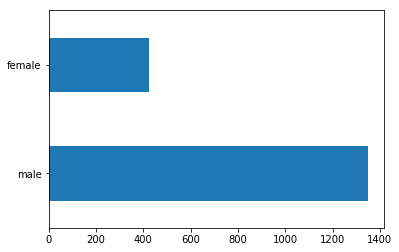

In [114]:
df_wall['sex'].value_counts().plot(kind='barh')

## Find the average age of a wall-puncher.

Graph the distribution of the ages, too.

In [115]:
df_wall['age'].mean()

24.303611738148984

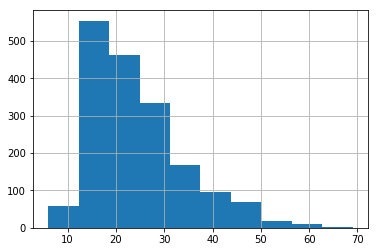

In [116]:
df_wall['age'].hist()

# Which months are the most popular for wall punching?

The month is hidden inside of the `trmt_date` column - you'll need to extract it. To check, January should have 27109 cases.

In [117]:
df_wall['trmt_date'].str.extract('(\d\d)/\d\d/\d\d\d\d').dropna().value_counts()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


09    175
06    170
05    162
10    162
04    156
03    151
11    145
12    142
07    134
01    132
08    131
02    112
Name: trmt_date, dtype: int64

## Graph the amount of wall punching in each month

Having numbers on the x axis (1-12) is fine.

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


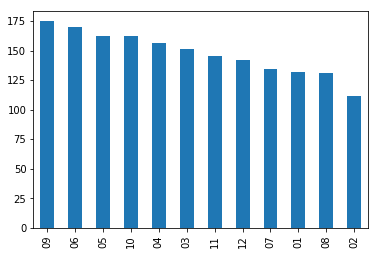

In [118]:
df_wall['trmt_date'].str.extract('(\d\d)/\d\d/\d\d\d\d').dropna().value_counts().plot(kind='bar')

## Sort the graph so that the months are in order from Jan-Dec (or 01-12)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


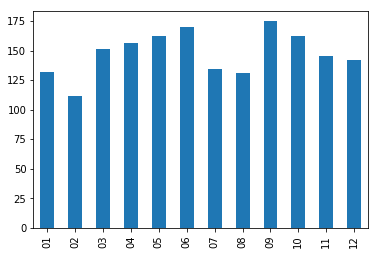

In [119]:
df_wall['trmt_date'].str.extract('(\d\d)/\d\d/\d\d\d\d').dropna().value_counts().sort_index().plot(kind='bar')

## What month is most common for air conditioner-related injuries?

Use the product code, which you can find in `2017ComparabilityTable.pdf` or `categories-cleaned.txt`.

In [120]:
df[df['prod1'] == 381]['trmt_date'].str.extract('(\d\d)/\d\d/\d\d\d\d').dropna().value_counts()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


07    45
06    43
08    42
09    36
05    32
10    32
04    17
12    17
11    15
03    14
02     9
01     8
Name: trmt_date, dtype: int64

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


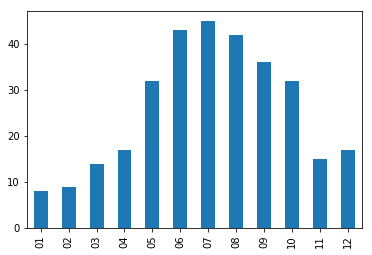

In [121]:
df[df['prod1'] == 381]['trmt_date'].str.extract('(\d\d)/\d\d/\d\d\d\d').dropna().value_counts().sort_index().plot(kind='bar')

## Find what else people punched using the prod1 and prod2 columns.

Look at the top 10 for each separately.

In [122]:
df_punch = df[df['narr1'].str.contains('PUNCH')]
df_punch['prod1'].value_counts().head(10)

1884    1796
1894     566
1893     244
1207     159
4004     122
276       74
4057      53
1892      48
1726      42
1807      41
Name: prod1, dtype: int64

In [123]:
df_punch['prod2'].value_counts().head(10)

1884.0    31
1893.0    13
1207.0     7
1807.0     7
1892.0     6
4056.0     6
604.0      4
1865.0     4
1819.0     3
676.0      3
Name: prod2, dtype: int64

## Uh, they're the same!

The order of `prod1` and `prod2` don't actually matter!

> When only one product is associated with an injury, place the product code for that product in the space allocated for "First Product Code" and fill in the "Second Product Code" spaces with 4 zeros (0000).
When two products are associated with an injury, either product may be coded as the first product and the other as the second product.
>
> Example: An 11-year old boy riding a bicycle ran into a swing. Code: Product 1 = 5040 (bicycle) and Product 2 = 3246 (swings) or
>
> Code: Product 1 = 3246 (swings) and Product 2 = 5040 (bicycle)

## Okay, okay, there’s no difference between prod1 and prod2, so you should add their frequencies together for an overall count!

It's *almost* as easy as adding together the `value_counts()`.

Take a look at the air conditioner question and the `.value_counts()` you just did, though, to see why combining them might not be that simple. **What is different about `prod1` and `prod2`?** You probably have to go all the way back up to where you read the file in to make them match.

In [124]:
result = df_punch['prod1'].value_counts().add(df_punch['prod2'].value_counts(), fill_value=0).astype('int').sort_values(ascending=False)
result.index = result.index.astype('int')
result.head(10)

1884    1827
1894     568
1893     257
1207     166
4004     124
276       74
1892      54
4057      53
1807      48
4056      43
dtype: int64

## Turn that into a dataframe

Use `.reset_index()` on the result to turn it into a dataframe. Rename your columns to be `product_code` and `injury_count`.

In [125]:
df_count = (result).reset_index().rename(columns={'index': 'product_code', 0: 'injury_count'})
df_count.head(10)

,product_code,injury_count
0,1884,1827
1,1894,568
2,1893,257
3,1207,166
4,4004,124
5,276,74
6,1892,54
7,4057,53
8,1807,48
9,4056,43


## Fix the product codes

Uh, wait, look at those product codes. "102" shouldn't be possible, it should be `0102` - this actually doesn't have to do with coding, it has to do with *the data doesn't match the codebook*.

### Add zeroes to the left of the product code until it is 4 characters long

In [153]:
df_count['product_code'] = df_count['product_code'].astype('str').str.pad(4, fillchar='0')
df_count.sort_values(by='injury_count', ascending=False).head(10)

,product_code,injury_count
0,1884,1827
1,1894,568
2,1893,257
3,1207,166
4,4004,124
5,0276,74
6,1892,54
7,4057,53
8,1807,48
9,4056,43


## Get meaningful names for "product code"

Join with `categories-cleaned.txt` to turn the codes into actual words. **When you read in `categories-cleaned.txt`, make sure it has 803 rows and 2 columns.**

In [137]:
df_cat = pd.read_csv('categories-cleaned.txt', names = ['product_code', 'meaning'])
df_cat['product_code'] = df_cat['product_code'].astype('str').str.pad(4, fillchar='0')
df_cat.shape

(803, 2)

In [154]:
df_merged = df_count.merge(df_cat, how='left', on='product_code')
df_merged.sort_values(by='injury_count', ascending=False).head(10)

,product_code,injury_count,meaning
0,1884,1827,Ceilings and walls (interior part of completed...
1,1894,568,"Windows and window glass, other than storm win..."
2,1893,257,"Doors, other or not specified"
3,1207,166,"Boxing (activity, apparel or equipment)"
4,4004,124,Mirrors or mirror glass (excluding lighted mak...
5,0276,74,Refrigerators
6,1892,54,Glass doors or doors with glass panels
7,4057,53,"Tables, not elsewhere classified (excl. baby c..."
8,1807,48,Floors or flooring materials
9,4056,43,"Cabinets, racks, room dividers and shelves, no..."


### Confirm that it worked by seeing if product code '0102' gives you 'Wringer washing machines"

In [140]:
df_merged[df_merged['product_code'] == '0102']

,product_code,injury_count,meaning


In [142]:
# it doesn't because of the left join. otherwise it would have worked:

df_test = df_count.merge(df_cat, how='outer', on='product_code')
df_test[df_test['product_code'] == '0102']

,product_code,injury_count,meaning
132,0102,NaN,Wringer washing machines


## Graph the top 10 most popular products for injuries 

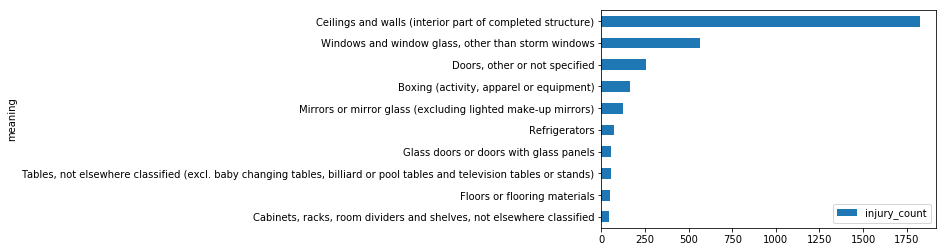

In [156]:
df_merged.sort_values(by='injury_count', ascending=False).head(10).sort_values(by='injury_count').plot(kind='barh', x='meaning')